In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns

In [88]:
df = pd.read_csv(r"C:\Users\ANAS\Downloads\iris.data.csv")
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,iristype
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [89]:
df.describe()


,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length in cm  150 non-null    float64
 1   sepal width in cm   150 non-null    float64
 2   petal length in cm  150 non-null    float64
 3   petal width in cm   150 non-null    float64
 4   iristype            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [91]:
df['iristype'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: iristype, dtype: int64

In [92]:
df.isnull().sum()

sepal length in cm    0
sepal width in cm     0
petal length in cm    0
petal width in cm     0
iristype              0
dtype: int64

<AxesSubplot:>

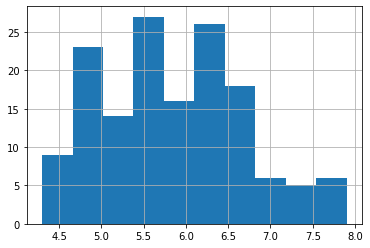

In [93]:
df['sepal length in cm'].hist()

<AxesSubplot:>

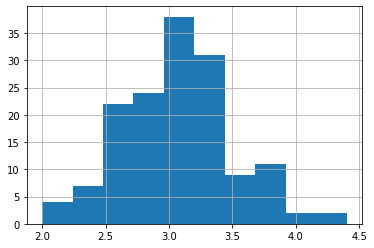

In [94]:
df['sepal width in cm'].hist()

<AxesSubplot:>

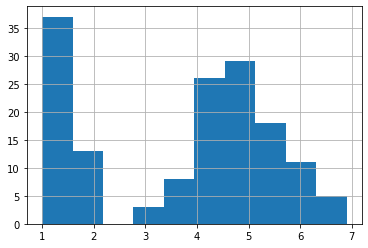

In [95]:
df[ 'petal length in cm'].hist()

<AxesSubplot:>

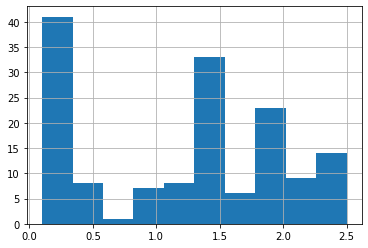

In [96]:
df['petal width in cm'].hist()

In [97]:
colors = ['red','orange','blue']
iristype = ['Iris-virginica','Iris-versicolor','Iris-setosa'] 

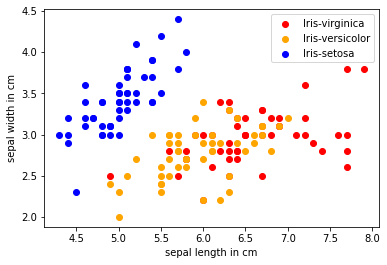

In [98]:
for i in range(3):
    x = df[df['iristype']== iristype[i]];
    plt.scatter(x['sepal length in cm'], x['sepal width in cm'], c = colors[i], label= iristype[i])
plt.xlabel('sepal length in cm')
plt.ylabel('sepal width in cm')
plt.legend()

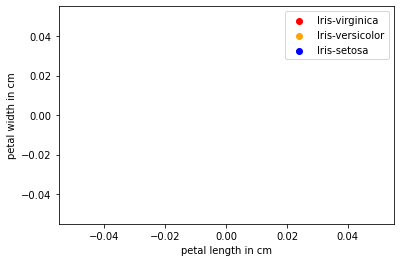

In [178]:
for i in range(3):
    x = df[df['iristype']== iristype[i]];
    plt.scatter(x['petal length in cm'], x['petal width in cm'], c = colors[i], label= iristype[i])
plt.xlabel('petal length in cm')
plt.ylabel('petal width in cm')
plt.legend()

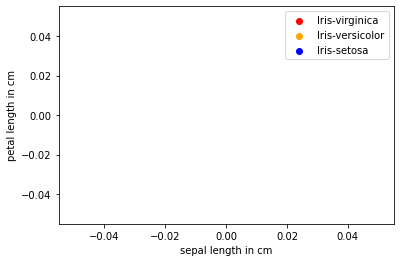

In [179]:
for i in range(3):
    x = df[df['iristype']== iristype[i]];
    plt.scatter(x['sepal length in cm'], x['petal length in cm'], c = colors[i], label= iristype[i])
plt.xlabel('sepal length in cm')
plt.ylabel('petal length in cm')
plt.legend()

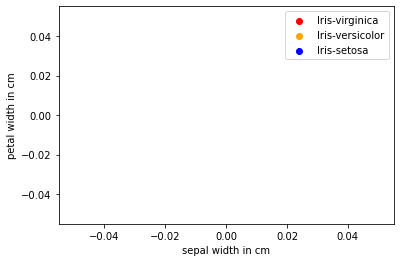

In [180]:
for i in range(3):
    x = df[df['iristype']== iristype[i]];
    plt.scatter(x['sepal width in cm'], x['petal width in cm'], c = colors[i], label= iristype[i])
plt.xlabel('sepal width in cm')
plt.ylabel('petal width in cm')
plt.legend()

In [181]:
df.corr()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,iristype
sepal length in cm,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width in cm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length in cm,0.871754,-0.420516,1.000000,0.962757,0.949043
petal width in cm,0.817954,-0.356544,0.962757,1.000000,0.956464
iristype,0.782561,-0.419446,0.949043,0.956464,1.000000


<AxesSubplot:>

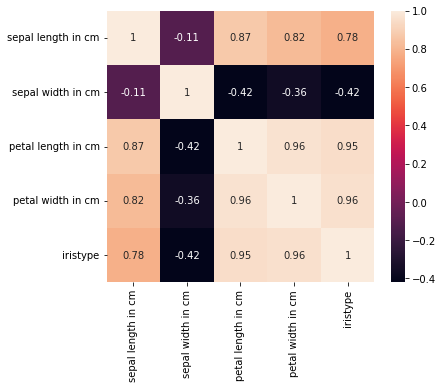

In [182]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(corr, annot= True,ax=ax)

In [183]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [184]:
df['iristype'] = le.fit_transform(df['iristype'])
df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,iristype
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [185]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['iristype'])
Y= df['iristype']
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.4)

In [186]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [187]:
model.fit( x_train, y_train) 

LogisticRegression()

In [188]:
print('Accuracy:', model.score(x_test,y_test)*100)

Accuracy: 91.66666666666666


In [189]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [190]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [191]:
print("Accuracy:", model.score(x_train,y_train)*100)

Accuracy: 98.88888888888889


In [192]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [193]:
model.fit(x_test,y_test)

DecisionTreeClassifier()

In [194]:
print("Accuracy:", model.score(x_test,y_test)*100)

Accuracy: 100.0
